<a href="https://colab.research.google.com/github/maryam-w07/Avatar-en/blob/main/wAV2VEC2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install datasets>=1.18.3
!pip install transformers==4.11.3
!pip install librosa
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 35.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (tokenizers)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.8 MB/s eta 0:00:00


In [3]:
pip install soundfile

Steps:
Load the dataset from Hugging Face.
Preprocess the audio (resampling, normalization, etc.).
Tokenize transcriptions using Wav2Vec2's tokenizer.
Prepare the model for training (fine-tune Wav2Vec2).
Evaluate using WER (Word Error Rate).

**Clonining Git Repo**

In [ ]:
!git clone https://github.com/maryam-w07/Avatar-en.git


Cloning into 'Avatar-en'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), done.


In [ ]:
import os
os.chdir("/content/Avatar-en")


In [ ]:
!pwd
!ls -a



/content/Avatar-en
.  ..  .git  .gitignore  README.md


**Hugging Face Sync**

The **Hugging Face token** is a personal access key that allows you to authenticate and interact with the Hugging Face Hub.

🔹 Why Do You Need It?
This token is required to:
✅ Access private models & datasets on Hugging Face
✅ Upload & share models (like your fine-tuned wav2vec2)
✅ Use the Hugging Face API without rate limits

🔹 How Is It Used?
When you log in (huggingface-cli login), the token lets Hugging Face recognize you.
When you push a model (model.push_to_hub()), it ensures only you can modify your own models.
If your model is private, the token is required to download it programmatically.

In [ ]:
from huggingface_hub import notebook_login

notebook_login()


In [ ]:
!huggingface-cli whoami


Mtrix7


In [ ]:
!cat /root/.huggingface/token


cat: /root/.huggingface/token: No such file or directory


In [ ]:
!huggingface-cli login



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: write

In [ ]:
!huggingface-cli whoami


Mtrix7


In [ ]:
!apt install git-lfs


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


**Dataset**

In [ ]:
from datasets import load_dataset

dataset = load_dataset("patrickvonplaten/librispeech_asr_dummy", "clean")  # or "other"

print(dataset)

KeyboardInterrupt: 

**Streaming** doesnt download the full dataset, it only loads req samples whereas huggingface's load_dataset first downloaded the entire dataset nd then splits it.

In [4]:
from datasets import load_dataset, DatasetDict

# Enable streaming and load datasets
dataset_train = load_dataset("librispeech_asr", "clean", split="train.100", streaming=True)
dataset_val = load_dataset("librispeech_asr", "clean", split="validation", streaming=True)
dataset_test = load_dataset("librispeech_asr", "clean", split="test", streaming=True)

small_train = list(dataset_train.take(400))
small_val = list(dataset_val.take(50))
small_test = list(dataset_test.take(50))
# Create a new dataset dictionary
small_dataset = DatasetDict({
    "train": small_train,
    "validation": small_val,
    "test": small_test
})
print(small_dataset)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

librispeech_asr.py:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

The repository for librispeech_asr contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/librispeech_asr.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y
DatasetDict({
    train: [{'file': '374-180298-0000.flac', 'audio': {'path': '374-180298-0000.flac', 'array': array([ 7.01904297e-04,  7.32421875e-04,  7.32421875e-04, ...,
           -2.74658203e-04, -1.83105469e-04, -3.05175781e-05]), 'sampling_rate': 16000}, 'text': 'CHAPTER SIXTEEN I MIGHT HAVE TOLD YOU OF THE BEGINNING OF THIS LIAISON IN A FEW LINES BUT I WANTED YOU TO SEE EVERY STEP BY WHICH WE CAME I TO AGREE TO WHATEVER MARGUERITE WISHED', 'speaker_id': 374, 'chapter_id': 180298, 'id': '374-180298-0000'}, {'file': '374-180298-0001.flac', 'audio': {'path': '374-180298-0001.flac', 'array': array([-9.15527344e-05, -1.52587891e-04, -1.52587891e-04, ...,
           

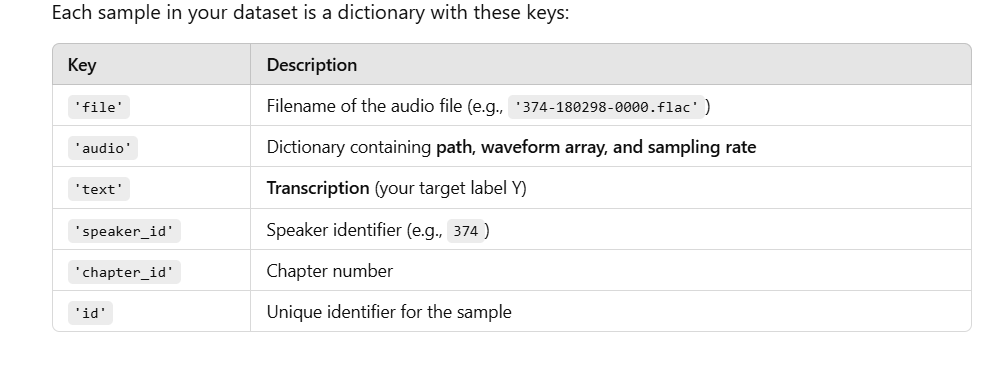

**The num_shards: 1 means that the dataset is stored in a single data shard (or partition).**

🔹 What are shards?
Datasets, especially large ones, are often split into multiple smaller files (shards) to improve parallel processing and streaming efficiency.
Instead of loading a single huge file (e.g., 23GB Librispeech ASR dataset), the data can be broken into smaller shards that are loaded and processed individually.

**⚠️ Note: Since you're using streaming mode, you cannot use .num_rows. Instead, you iterate over the dataset to count the samples.**

In [5]:
# Print first 10 samples from train, val, and test sets
def print_samples(dataset, name):
    print(f"\n🔹 First 10 {name} Samples:")
    for i, sample in enumerate(dataset[:10]):
        print(f"Sample {i+1}:")
        print(f"  File: {sample['file']}")
        print(f"  Text (Y): {sample['text']}")
        print(f"  Audio Path: {sample['audio']['path']}")
        print(f"  Sampling Rate: {sample['audio']['sampling_rate']}")
        print(f"  Speaker ID: {sample['speaker_id']}")
        print("-" * 60)

print_samples(small_dataset["train"], "Train")
print_samples(small_dataset["validation"], "Validation")
print_samples(small_dataset["test"], "Test")



🔹 First 10 Train Samples:
Sample 1:
  File: 374-180298-0000.flac
  Text (Y): CHAPTER SIXTEEN I MIGHT HAVE TOLD YOU OF THE BEGINNING OF THIS LIAISON IN A FEW LINES BUT I WANTED YOU TO SEE EVERY STEP BY WHICH WE CAME I TO AGREE TO WHATEVER MARGUERITE WISHED
  Audio Path: 374-180298-0000.flac
  Sampling Rate: 16000
  Speaker ID: 374
------------------------------------------------------------
Sample 2:
  File: 374-180298-0001.flac
  Text (Y): MARGUERITE TO BE UNABLE TO LIVE APART FROM ME IT WAS THE DAY AFTER THE EVENING WHEN SHE CAME TO SEE ME THAT I SENT HER MANON LESCAUT FROM THAT TIME SEEING THAT I COULD NOT CHANGE MY MISTRESS'S LIFE I CHANGED MY OWN
  Audio Path: 374-180298-0001.flac
  Sampling Rate: 16000
  Speaker ID: 374
------------------------------------------------------------
Sample 3:
  File: 374-180298-0002.flac
  Text (Y): I WISHED ABOVE ALL NOT TO LEAVE MYSELF TIME TO THINK OVER THE POSITION I HAD ACCEPTED FOR IN SPITE OF MYSELF IT WAS A GREAT DISTRESS TO ME THUS MY LIFE 

**pre-processing**

**normalize the text** for Librispeech ASR,if not using a language model. Here’s why:

✅*** Remove special characters:*** Punctuation marks like ,.?!;: don’t have a clear sound representation in speech and can make training harder.


✅ ***Convert to lowercase***: ASR models typically perform better when the text is standardized, and Librispeech usually provides transcriptions in uppercase. Lowercasing ensures consistency.

In [6]:
import re

chars_to_ignore_regex = r'[\,\?\.\!\-\;\:\"]'

def clean_text(example):
    """Removes special characters and lowercases the text."""
    example["text"] = re.sub(chars_to_ignore_regex, '', example["text"]).lower()
    return example

# Apply the transformation
small_dataset = {
    split: [clean_text(sample) for sample in small_dataset[split]]  # Process each element in the list
    for split in ["train", "validation", "test"]
}

# Print 10 cleaned samples from each split
for split in ["train", "validation", "test"]:
    print(f"\n🔹 **{split.upper()} Samples:**\n")
    for i, sample in enumerate(small_dataset[split][:10]):  # Now indexing works
        print(sample["text"])





🔹 **TRAIN Samples:**

chapter sixteen i might have told you of the beginning of this liaison in a few lines but i wanted you to see every step by which we came i to agree to whatever marguerite wished
marguerite to be unable to live apart from me it was the day after the evening when she came to see me that i sent her manon lescaut from that time seeing that i could not change my mistress's life i changed my own
i wished above all not to leave myself time to think over the position i had accepted for in spite of myself it was a great distress to me thus my life generally so calm
assumed all at once an appearance of noise and disorder never believe however disinterested the love of a kept woman may be that it will cost one nothing
nothing is so expensive as their caprices flowers boxes at the theatre suppers days in the country which one can never refuse to one's mistress as i have told you i had little money
my father was and still is receveur general at c he has a great reputation th

In [7]:
import random
def show_random_samples(dataset_split, num_samples=10):
    """Randomly selects and prints 10 cleaned samples from a streamed dataset."""
    samples = []

    for sample in dataset_split:  # Iterate over the stream
        samples.append(clean_text(sample))  # Clean text and store sample
        if len(samples) > num_samples * 2:  # Stop early for efficiency
            break

    random.shuffle(samples)  # Shuffle and take random 10
    samples = samples[:num_samples]

    print(f"\n🔹 **Showing {num_samples} random samples**:\n")
    for i, sample in enumerate(samples):
        print(f"{i+1}. {sample['text']}")

# Show random 10 samples for train, validation, and test
for split in ["train", "validation", "test"]:
    print(f"\n🚀 **{split.upper()} DATASET:**")
    show_random_samples(small_dataset[split])


🚀 **TRAIN DATASET:**

🔹 **Showing 10 random samples**:

1. as not to know that i was living them i began by borrowing five or six thousand francs on my little capital and with this i took to gambling since gambling houses were destroyed gambling goes on everywhere
2. i wished above all not to leave myself time to think over the position i had accepted for in spite of myself it was a great distress to me thus my life generally so calm
3. and all the simplicity of its developments i realized then that as nothing in the world would make me forget my mistress it was needful for me to find some way of meeting the expenses into which she drew me then too
4. marguerite's nature was very capricious and like so many women she never regarded as a serious expense those thousand and one distractions which made up her life so wishing to spend as much time with me as possible
5. for the rest not a penny of debt this then was my position when i made the acquaintance of marguerite you can well unders

# **In CTC**, it is common to classify speech chunks into letters, so we will do the same here. Let's extract all distinct letters of the training and test data and build our vocabulary from this set of letters.


Let's **extract the distinct letters from the transcriptions and build the vocabulary**.

Here's the process:

**Concatenate all transcriptions into a single strin**g.


**Extract unique characters from this string**.


Sort them to create the vocabulary **bold text**


Since we're using a streaming dataset (small_dataset), we need a slightly different approach because map(batched=True) doesn't work directly with streaming. Instead, we'll iterate over the dataset manually.

In [8]:
# Extract unique characters from the dataset
def extract_vocab(dataset):
    all_text = " ".join(sample["text"] for split in ["train", "validation", "test"] for sample in dataset[split])
    return sorted(set(all_text))  # Sort for consistency

# Get the vocabulary
vocab_list = extract_vocab(small_dataset)

# Print vocabulary
print("Vocabulary:", vocab_list)
print("Vocabulary Size:", len(vocab_list))




Vocabulary: [' ', "'", 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Vocabulary Size: 28


we also extracted the special characters " " and '. Note that we did not exclude those special characters because:

The model has to learn to predict when a word finished or else the model prediction would always be a sequence of chars which would make it impossible to separate words from each other.

In [9]:
# Replace space with "|"
vocab_list[vocab_list.index(" ")] = "|"

# Add CTC blank token and unknown token
vocab_list.append("[UNK]")  # Unknown token
vocab_list.append("[PAD]")  # Padding token

# Print final vocabulary size
print("Updated Vocabulary Size:", len(vocab_list))
print("Vocabulary:", vocab_list)


Updated Vocabulary Size: 30
Vocabulary: ['|', "'", 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '[UNK]', '[PAD]']


**the linear layer that we will add on top of the pretrained Wav2Vec2 checkpoint will have an output dimension of 30.**

In [10]:
vocab_dict = {char: idx for idx, char in enumerate(vocab_list)} #list to vocab since tokenizer expects a list
print(vocab_dict)





{'|': 0, "'": 1, 'a': 2, 'b': 3, 'c': 4, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9, 'i': 10, 'j': 11, 'k': 12, 'l': 13, 'm': 14, 'n': 15, 'o': 16, 'p': 17, 'q': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'v': 23, 'w': 24, 'x': 25, 'y': 26, 'z': 27, '[UNK]': 28, '[PAD]': 29}


In [11]:
import json

vocab_path = "vocab.json"
with open(vocab_path, "w") as f:
    json.dump(vocab_dict, f)  # Save dictionary


**WAV2VEC PRE-TRAINED TOKENIZER**

In [12]:
#initialize the Wav2Vec2CTCTokenizer using our saved vocabulary JSON file
from transformers import Wav2Vec2CTCTokenizer

# Load the tokenizer using the saved vocabulary file
tokenizer = Wav2Vec2CTCTokenizer("vocab.json", unk_token="[UNK]", pad_token="[PAD]", word_delimiter_token="|")

# Save the tokenizer
tokenizer.save_pretrained("wav2vec2-tokenizer")

print("Tokenizer initialized and saved successfully!")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Tokenizer initialized and saved successfully!


**Feature Extraction**

A Wav2Vec2 feature extractor object requires the following parameters to be instantiated:

feature_size: Speech models take a sequence of feature vectors as an input. While the length of this sequence obviously varies, the feature size should not. In the case of Wav2Vec2, the feature size is 1 because the model was trained on the raw speech signal
2

  .
sampling_rate: The sampling rate at which the model is trained on.

padding_value: For batched inference, shorter inputs need to be padded with a specific value

do_normalize: Whether the input should be zero-mean-unit-variance normalized or not. Usually, speech models perform better when normalizing the input

return_attention_mask: Whether the model should make use of an attention_mask for batched inference.

 In general, models should always make use of the attention_mask to mask padded tokens. However, due to a very specific design choice of Wav2Vec2's "base" checkpoint, better results are achieved when using no attention_mask. This is not recommended for other speech models. For more information, one can take a look at this issue. Important If you want to use this notebook to fine-tune large-lv60, this parameter should be set to True.

In [13]:
from transformers import Wav2Vec2FeatureExtractor

feature_extractor = Wav2Vec2FeatureExtractor(feature_size=1, sampling_rate=16000, padding_value=0.0, do_normalize=True, return_attention_mask=False)


**Wav2Vec2 was pretrained** on the audio data of LibriSpeech and LibriVox which both were **sampling with 16kHz.**

A pretrained checkpoint expects its input data to have been sampled more or less from the** same distribution** as the data it was trained on.

In [14]:
tokenizer = Wav2Vec2CTCTokenizer(
    "vocab.json",
    unk_token="[UNK]",
    pad_token="[PAD]",
    word_delimiter_token="|"
)

In [15]:
from transformers import Wav2Vec2Processor

processor = Wav2Vec2Processor(feature_extractor=feature_extractor, tokenizer=tokenizer)


In [ ]:
print(small_dataset["train"][0]["path"])


KeyError: 'path'

In [16]:
print(small_dataset["train"][0]["audio"])


{'path': '374-180298-0000.flac', 'array': array([ 7.01904297e-04,  7.32421875e-04,  7.32421875e-04, ...,
       -2.74658203e-04, -1.83105469e-04, -3.05175781e-05]), 'sampling_rate': 16000}


dataset contains three key elements for each sample:

path: The filename of the audio (374-180298-0000.flac).
array: The raw waveform values as a NumPy array.
sampling_rate: The sample rate of the audio (16,000 Hz).

In [17]:
from IPython.display import Audio

# Select an audio sample (adjust index as needed)
sample = small_dataset["train"][0]  # Change index for different samples

# Extract the waveform array and sampling rate
audio_array = sample["audio"]["array"]
sampling_rate = sample["audio"]["sampling_rate"]

# Play the audio
Audio(audio_array, rate=sampling_rate)


In [ ]:
sample = small_dataset["validation"][49]  # Change index for different samples

# Extract the waveform array and sampling rate
audio_array = sample["audio"]["array"]
sampling_rate = sample["audio"]["sampling_rate"]

# Play the audio
Audio(audio_array, rate=sampling_rate)

In [ ]:
# Select a sample from the dataset
sample = small_dataset["train"][250]  # Change index as needed

# Extract audio features
audio_array = sample["audio"]["array"]
sampling_rate = sample["audio"]["sampling_rate"]
transcription = sample["text"]

# Print the details
print(f"🔹 Audio Shape: {audio_array.shape if hasattr(audio_array, 'shape') else len(audio_array)}")
print(f"🔹 Sampling Rate: {sampling_rate} Hz")
print(f"🔹 Transcription: {transcription}")


🔹 Audio Shape: (249360,)
🔹 Sampling Rate: 16000 Hz
🔹 Transcription: and consummately reckoned that was the story that she was always for her beneficent dragon under arms living up every hour but especially at festal hours to the value missus lowder had attached to her


**i/p audio should be 1-d array which it is and the target text normalized.**

In [18]:
for i, sample in enumerate(small_dataset["train"][:5]):  # Check first 5 samples
    audio_array = sample["audio"]["array"]
    sampling_rate = sample["audio"]["sampling_rate"]

    duration_sec = len(audio_array) / sampling_rate
    print(f"Sample {i}: {len(audio_array)} samples ({duration_sec:.2f} sec)")


Sample 0: 232480 samples (14.53 sec)
Sample 1: 257360 samples (16.09 sec)
Sample 2: 212720 samples (13.29 sec)
Sample 3: 178000 samples (11.12 sec)
Sample 4: 225280 samples (14.08 sec)


In [19]:
print(type(small_dataset))


<class 'dict'>


In [20]:
print(type(small_dataset))  # Should print <class 'dict'>
print(small_dataset.keys())  # Show available keys (e.g., 'train', 'test', etc.)

# Print a few samples from one split
for key in small_dataset:
    print(f"First samples from {key} split:")
    print(small_dataset[key][:1])  # Correct way to access data
    break  # Only print for the first split



<class 'dict'>
dict_keys(['train', 'validation', 'test'])
First samples from train split:
[{'file': '374-180298-0000.flac', 'audio': {'path': '374-180298-0000.flac', 'array': array([ 7.01904297e-04,  7.32421875e-04,  7.32421875e-04, ...,
       -2.74658203e-04, -1.83105469e-04, -3.05175781e-05]), 'sampling_rate': 16000}, 'text': 'chapter sixteen i might have told you of the beginning of this liaison in a few lines but i wanted you to see every step by which we came i to agree to whatever marguerite wished', 'speaker_id': 374, 'chapter_id': 180298, 'id': '374-180298-0000'}]


In [21]:
print(type(small_dataset["train"]))


<class 'list'>


In [22]:
print(type(small_dataset["train"][0]["text"]))  # Should print <class 'str'>


<class 'str'>


In [23]:
def process_batch(batch):
    audio = batch["audio"]["array"]  # Extract audio waveform
    text = batch["text"]  # Extract text

    processed = processor(audio=audio, sampling_rate=16000, text=text)

    return {
        "input_values": processed["input_values"][0],  # Processed audio
        "labels": processed["labels"],  # Tokenized labels
    }






Wav2Vec2 processes batches by default.
Even when processing a single sample, it still wraps it in a list inside a list.
processed["input_values"][0] extracts the actual data we need for the model.

In [24]:
processed_dataset = {
    "train": [process_batch(batch) for batch in small_dataset["train"]],
    "validation": [process_batch(batch) for batch in small_dataset["validation"]],
    "test": [process_batch(batch) for batch in small_dataset["test"]],
}


In [25]:
print(sample)



{'file': '374-180298-0004.flac', 'audio': {'path': '374-180298-0004.flac', 'array': array([0.00027466, 0.00030518, 0.00021362, ..., 0.00015259, 0.00015259,
       0.00015259]), 'sampling_rate': 16000}, 'text': "nothing is so expensive as their caprices flowers boxes at the theatre suppers days in the country which one can never refuse to one's mistress as i have told you i had little money", 'speaker_id': 374, 'chapter_id': 180298, 'id': '374-180298-0004'}


In [26]:
# Print a processed sample from the train set
sample = processed_dataset["train"][0]  # Change index if needed
print("Processed Sample:", sample)


Processed Sample: {'input_values': array([ 0.01174969,  0.01224525,  0.01224525, ..., -0.00410848,
       -0.00262178, -0.00014394], dtype=float32), 'labels': [4, 9, 2, 17, 21, 6, 19, 0, 20, 10, 25, 21, 6, 6, 15, 0, 10, 0, 14, 10, 8, 9, 21, 0, 9, 2, 23, 6, 0, 21, 16, 13, 5, 0, 26, 16, 22, 0, 16, 7, 0, 21, 9, 6, 0, 3, 6, 8, 10, 15, 15, 10, 15, 8, 0, 16, 7, 0, 21, 9, 10, 20, 0, 13, 10, 2, 10, 20, 16, 15, 0, 10, 15, 0, 2, 0, 7, 6, 24, 0, 13, 10, 15, 6, 20, 0, 3, 22, 21, 0, 10, 0, 24, 2, 15, 21, 6, 5, 0, 26, 16, 22, 0, 21, 16, 0, 20, 6, 6, 0, 6, 23, 6, 19, 26, 0, 20, 21, 6, 17, 0, 3, 26, 0, 24, 9, 10, 4, 9, 0, 24, 6, 0, 4, 2, 14, 6, 0, 10, 0, 21, 16, 0, 2, 8, 19, 6, 6, 0, 21, 16, 0, 24, 9, 2, 21, 6, 23, 6, 19, 0, 14, 2, 19, 8, 22, 6, 19, 10, 21, 6, 0, 24, 10, 20, 9, 6, 5]}


In [27]:
print(processed_dataset["train"][0])
# Expected output:
# {"input_values": <Tensor>, "labels": <Tensor>}


{'input_values': array([ 0.01174969,  0.01224525,  0.01224525, ..., -0.00410848,
       -0.00262178, -0.00014394], dtype=float32), 'labels': [4, 9, 2, 17, 21, 6, 19, 0, 20, 10, 25, 21, 6, 6, 15, 0, 10, 0, 14, 10, 8, 9, 21, 0, 9, 2, 23, 6, 0, 21, 16, 13, 5, 0, 26, 16, 22, 0, 16, 7, 0, 21, 9, 6, 0, 3, 6, 8, 10, 15, 15, 10, 15, 8, 0, 16, 7, 0, 21, 9, 10, 20, 0, 13, 10, 2, 10, 20, 16, 15, 0, 10, 15, 0, 2, 0, 7, 6, 24, 0, 13, 10, 15, 6, 20, 0, 3, 22, 21, 0, 10, 0, 24, 2, 15, 21, 6, 5, 0, 26, 16, 22, 0, 21, 16, 0, 20, 6, 6, 0, 6, 23, 6, 19, 26, 0, 20, 21, 6, 17, 0, 3, 26, 0, 24, 9, 10, 4, 9, 0, 24, 6, 0, 4, 2, 14, 6, 0, 10, 0, 21, 16, 0, 2, 8, 19, 6, 6, 0, 21, 16, 0, 24, 9, 2, 21, 6, 23, 6, 19, 0, 14, 2, 19, 8, 22, 6, 19, 10, 21, 6, 0, 24, 10, 20, 9, 6, 5]}


In [28]:
print("Min of Processed Input Values:", min(sample["input_values"]))
print("Max of Processed Input Values:", max(sample["input_values"]))


Min of Processed Input Values: -8.57297
Max of Processed Input Values: 9.145063


In [ ]:
import numpy as np

print("Mean of Processed Input Values:", np.mean(sample["input_values"]))
print("Std Dev of Processed Input Values:", np.std(sample["input_values"]))


Mean of Processed Input Values: -2.8229394e-09
Std Dev of Processed Input Values: 0.9999868


In [ ]:
import numpy as np

# Get raw audio before processing
raw_audio = small_dataset["train"][0]["audio"]["array"]

# Get processed audio
processed_audio = processed_dataset["train"][0]["input_values"]

# Print statistics
print("🔹 Raw Audio Min-Max:", np.min(raw_audio), "to", np.max(raw_audio))
print("🔹 Processed Audio Min-Max:", np.min(processed_audio), "to", np.max(processed_audio))
print("🔹 Processed Audio Mean:", np.mean(processed_audio), "Std Dev:", np.std(processed_audio))


🔹 Raw Audio Min-Max: -0.5279541015625 to 0.563140869140625
🔹 Processed Audio Min-Max: -8.57297 to 9.145063
🔹 Processed Audio Mean: -2.8229394e-09 Std Dev: 0.9999868


Sound waves are sinusoidal and oscillate around zero.
Negative values represent the downward oscillations of the wave. **bold text**

**Training**

In [29]:
import torch
from dataclasses import dataclass
from typing import Any, Dict, List, Optional, Union
from transformers import Wav2Vec2Processor  # ✅ Add this import

@dataclass
class DataCollatorCTCWithPadding:
    processor: Wav2Vec2Processor
    padding: Union[bool, str] = True
    max_length: Optional[int] = None
    max_length_labels: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None
    pad_to_multiple_of_labels: Optional[int] = None

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_values": feature["input_values"]} for feature in features]
        label_features = [{"input_ids": feature["labels"]} for feature in features]

        batch = self.processor.pad(
            input_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )

        with self.processor.as_target_processor():
            labels_batch = self.processor.pad(
                label_features,
                padding=self.padding,
                max_length=self.max_length_labels,
                pad_to_multiple_of=self.pad_to_multiple_of_labels,
                return_tensors="pt",
            )

        # Replace padding with -100 to ignore loss correctly
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        batch["labels"] = labels

        return batch




In [30]:
data_collator = DataCollatorCTCWithPadding(processor=processor, padding=True)


In [31]:
pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.9 MB/s eta 0:00:00


In [ ]:
from evaluate import load

wer_metric = load("wer")


In [32]:
def compute_metrics(pred):
    pred_logits = pred.predictions
    pred_ids = np.argmax(pred_logits, axis=-1)

    pred.label_ids[pred.label_ids == -100] = processor.tokenizer.pad_token_id

    pred_str = processor.batch_decode(pred_ids)
    # we do not want to group tokens when computing the metrics
    label_str = processor.batch_decode(pred.label_ids, group_tokens=False)

    wer = wer_metric.compute(predictions=pred_str, references=label_str)

    return {"wer": wer}

In [34]:
from transformers import Wav2Vec2ForCTC

model = Wav2Vec2ForCTC.from_pretrained(
    "facebook/wav2vec2-base",
    ctc_loss_reduction="mean",
    pad_token_id=processor.tokenizer.pad_token_id,
)


config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/configuration_utils.py:312: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/380M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['lm_head.bias', 'lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
import inspect
print(inspect.signature(Wav2Vec2ForCTC.from_pretrained))


(pretrained_model_name_or_path: Union[str, os.PathLike, NoneType], *model_args, config: Union[transformers.configuration_utils.PretrainedConfig, str, os.PathLike, NoneType] = None, cache_dir: Union[str, os.PathLike, NoneType] = None, ignore_mismatched_sizes: bool = False, force_download: bool = False, local_files_only: bool = False, token: Union[str, bool, NoneType] = None, revision: str = 'main', use_safetensors: Optional[bool] = None, weights_only: bool = True, **kwargs) -> ~SpecificPreTrainedModelType


In [35]:
model.freeze_feature_extractor()


/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2/modeling_wav2vec2.py:2176: FutureWarning: The method `freeze_feature_extractor` is deprecated and will be removed in Transformers v5. Please use the equivalent `freeze_feature_encoder` method instead.
  warnings.warn(


In [82]:
from transformers import TrainingArguments, Wav2Vec2Processor # import TrainingArguments

training_args = TrainingArguments(
  output_dir="./local_model",  # Save locally
  group_by_length=True,
  max_steps=1000,
  per_device_train_batch_size=32,
  evaluation_strategy="steps",
  num_train_epochs=30,
  fp16=True,
  gradient_checkpointing=True,
  save_steps=500,
  eval_steps=500,
  logging_steps=500,
  learning_rate=1e-4,
  weight_decay=0.005,
  warmup_steps=1000,
  save_total_limit=2,
  push_to_hub=False  # 🚨 This prevents uploading to Hugging Face Hub
)



/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [84]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./local_model",
  max_steps=2000,
  num_train_epochs=20,  # ✅ Train for 20 epochs
    # ✅ Ensure training completes all epochs
  per_device_train_batch_size=32,
  evaluation_strategy="steps",  # Evaluate at specific steps
  fp16=True,
  gradient_checkpointing=True,
  save_steps=500,  # Save model every 500 steps
  eval_steps=500,  # Evaluate every 500 steps
  logging_steps=100,  # ✅ Log progress every 100 steps
  learning_rate=1e-4,
  weight_decay=0.005,
  warmup_steps=1000,
  save_total_limit=2,  # Keep only the latest 2 checkpoints
  push_to_hub=False  # Avoid uploading to Hugging Face Hub
)



/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [85]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    data_collator=data_collator,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=processed_dataset["train"],
    eval_dataset=processed_dataset["validation"],
    tokenizer=processor.feature_extractor,
)



<ipython-input-85-0298f5176b20>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [86]:
print(processed_dataset["train"][0])


{'input_values': array([ 0.01174969,  0.01224525,  0.01224525, ..., -0.00410848,
       -0.00262178, -0.00014394], dtype=float32), 'labels': [4, 9, 2, 17, 21, 6, 19, 0, 20, 10, 25, 21, 6, 6, 15, 0, 10, 0, 14, 10, 8, 9, 21, 0, 9, 2, 23, 6, 0, 21, 16, 13, 5, 0, 26, 16, 22, 0, 16, 7, 0, 21, 9, 6, 0, 3, 6, 8, 10, 15, 15, 10, 15, 8, 0, 16, 7, 0, 21, 9, 10, 20, 0, 13, 10, 2, 10, 20, 16, 15, 0, 10, 15, 0, 2, 0, 7, 6, 24, 0, 13, 10, 15, 6, 20, 0, 3, 22, 21, 0, 10, 0, 24, 2, 15, 21, 6, 5, 0, 26, 16, 22, 0, 21, 16, 0, 20, 6, 6, 0, 6, 23, 6, 19, 26, 0, 20, 21, 6, 17, 0, 3, 26, 0, 24, 9, 10, 4, 9, 0, 24, 6, 0, 4, 2, 14, 6, 0, 10, 0, 21, 16, 0, 2, 8, 19, 6, 6, 0, 21, 16, 0, 24, 9, 2, 21, 6, 23, 6, 19, 0, 14, 2, 19, 8, 22, 6, 19, 10, 21, 6, 0, 24, 10, 20, 9, 6, 5]}


In [51]:
import os
os.environ["WANDB_DISABLED"] = "true"


In [52]:
import numpy as np

In [87]:
trainer.train()


/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:174: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(


OutOfMemoryError: CUDA out of memory. Tried to allocate 3.31 GiB. GPU 0 has a total capacity of 14.74 GiB of which 4.12 MiB is free. Process 6388 has 14.73 GiB memory in use. Of the allocated memory 8.42 GiB is allocated by PyTorch, and 6.18 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [59]:
from transformers import Wav2Vec2Processor

model.save_pretrained("./local_model")  # ✅ Save trained model
processor.save_pretrained("./local_model")  # ✅ Save processor (important!)


[]

In [60]:
import os

print(os.listdir("./local_model"))  # List saved model files


['config.json', 'checkpoint-260', 'special_tokens_map.json', 'tokenizer_config.json', 'vocab.json', 'added_tokens.json', 'preprocessor_config.json', 'model.safetensors', 'runs']


In [78]:
# Select a sample from the validation set (change index as needed)
sample = processed_dataset["validation"][1]  # Assuming 'test' is your validation split
input_values = torch.tensor(sample["input_values"]).unsqueeze(0)  # Convert to tensor


In [74]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import torch

# Load the processor and model from your checkpoint
processor = Wav2Vec2Processor.from_pretrained("./local_model")  # Path where model was saved
model = Wav2Vec2ForCTC.from_pretrained("./local_model")

# Set model to evaluation mode
model.eval()


Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder)

In [79]:
with torch.no_grad():  # No gradients needed for inference
    logits = model(input_values).logits  # Get raw predictions (logits)


In [80]:
print(logits.shape)  # Expected: (1, sequence_length, vocab_size)
print(torch.argmax(logits, dim=-1))  # See predicted token indices


torch.Size([1, 357, 32])
tensor([[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
   

In [81]:
# Convert logits to predicted token indices
predicted_ids = torch.argmax(logits, dim=-1)

# Decode token IDs into text
transcription = processor.batch_decode(predicted_ids)[0]

print("Predicted Transcription:", transcription)


Predicted Transcription: 


**DAtaloader**

**Model Development**